# Data Analysis

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
dataframe=pd.read_csv("CarData.csv")
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
dataframe.shape

(301, 9)

In [47]:
numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtype!="O"]
catergorical_features=[feature for feature in dataframe.columns  if dataframe[feature].dtype=="O"]
continues_feature=[feature for feature in  dataframe.columns if len(dataframe[feature].unique()) < 5 ]

In [48]:
print(f"numerical feature {numerical_features}")
print(f"categorical_feature{catergorical_features}")
print(f" continumes features {continues_feature}")

numerical feature ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
categorical_feature['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
 continumes features ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


### Finding the Null Values

In [26]:
dataframe.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Thas good not to have any null value in the dataset so no extra stuff to handle the null value

### Unique Categorical_feature

In [67]:
for feature in continues_feature:
    print(f"{feature}  {dataframe[feature].unique()}")

Fuel_Type  ['Petrol' 'Diesel' 'CNG']
Seller_Type  ['Dealer' 'Individual']
Transmission  ['Manual' 'Automatic']
Owner  [0 1 3]


### Distribution of Data

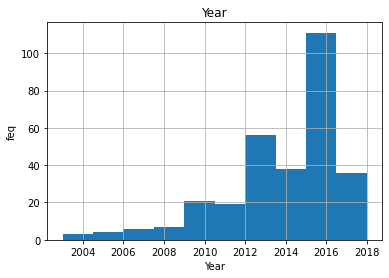

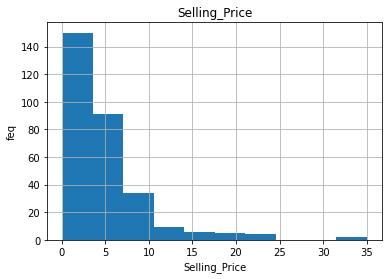

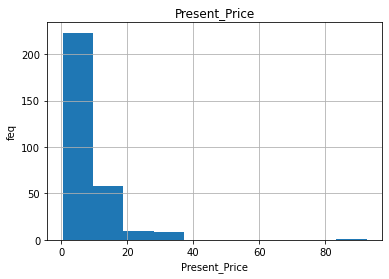

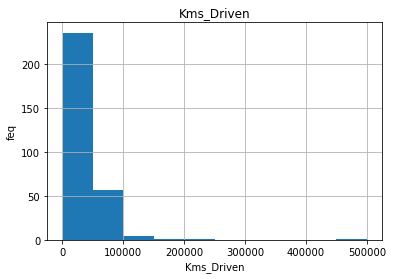

In [78]:
for feature  in numerical_features:
    if feature not in continues_feature:
        dataframe[feature].hist()
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel("feq")
        plt.show()

### Outliyers

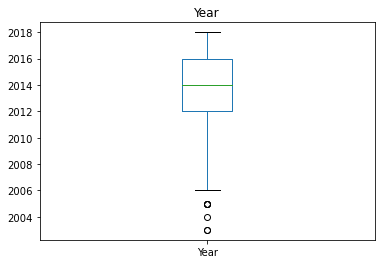

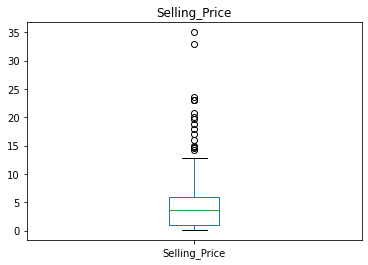

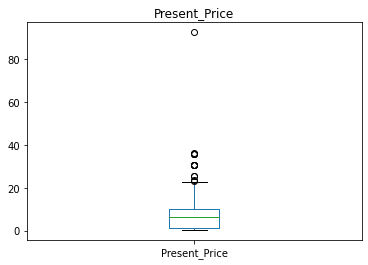

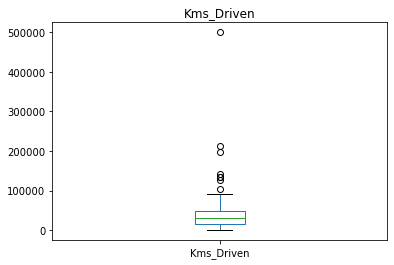

In [82]:
for feature in numerical_features:
    if feature not in continues_feature:
        dataframe[feature].plot.box()
        plt.title(feature)
        plt.show()

### Data Corelation

In [84]:
dataframe.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


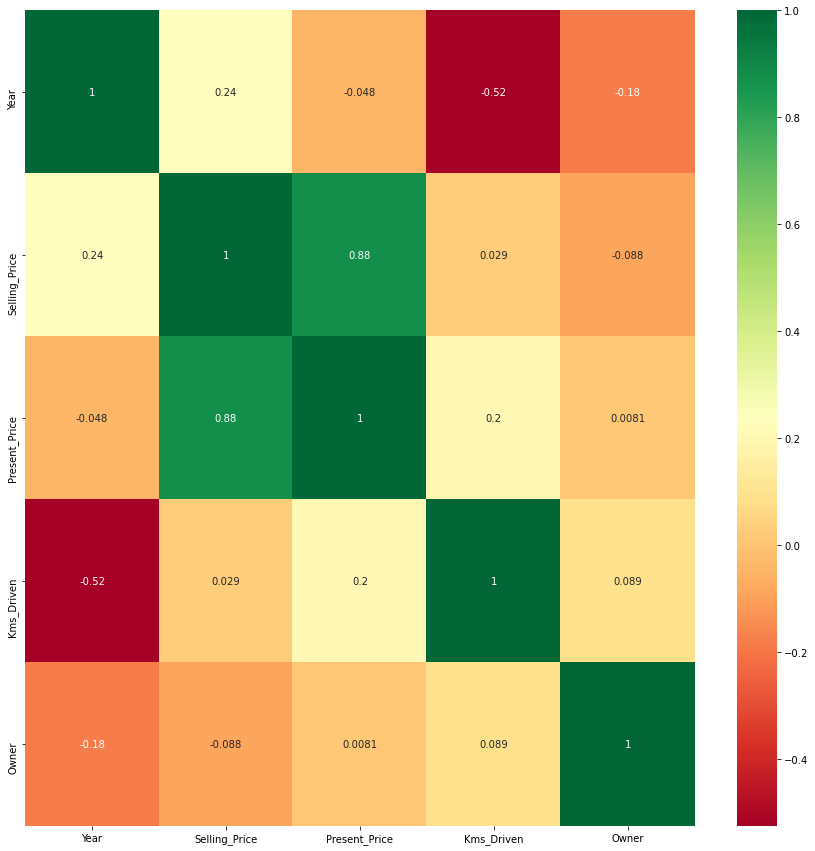

In [98]:
cormat=dataframe.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(15,15))
sns.heatmap(dataframe[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

From corelation in clearly state that the year and the owner not play an import role in predicting the car prise

# @a2aniket